# VHR example
Let's use EOReader with Very High Resolution data.

## Imports

In [1]:
import os

# EOReader
from eoreader.reader import Reader
from eoreader.bands import GREEN, NDVI, TIR_1, CLOUDS, HILLSHADE, to_str
from eoreader.env_vars import DEM_PATH

## Create the logger

In [2]:
# Create logger
import logging
from sertit import logs

logger = logging.getLogger("eoreader")
logs.init_logger(logger)

# Open the VHR product

Please be aware that EOReader will always work in UTM projection.  
So if you give WGS84 data, EOReader will reproject the stacks and this can be time-consuming

In [3]:
# Set a DEM as we will load some DEM bands
os.environ[DEM_PATH] = os.path.join(
    "/home", "ds2_db2", "BASES_DE_DONNEES", "GLOBAL", "COPDEM_30m", "COPDEM_30m.vrt"
)

# Open your product
path = os.path.join("/home", "prods", "PLEIADES", "5547047101", "IMG_PHR1A_PMS_001")
reader = Reader()
prod = reader.open(path, remove_tmp=True)
prod

eoreader.PldProduct 'PHR1A_PMS_202005110231585_ORT_5547047101'
Attributes:
	condensed_name: 20200511T023158_PLD_ORT_PMS_5547047101
	path: /home/prods/PLEIADES/5547047101/IMG_PHR1A_PMS_001
	constellation: Pleiades
	sensor type: Optical
	product type: Ortho Single Image
	default pixel size: 0.5
	default resolution: 0.5
	acquisition datetime: 2020-05-11T02:31:58
	band mapping:
		BLUE: 3
		GREEN: 2
		RED: 1
		NIR: 4
		NARROW_NIR: 4
	needs extraction: False
	cloud cover: 0.0

/opt/conda/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


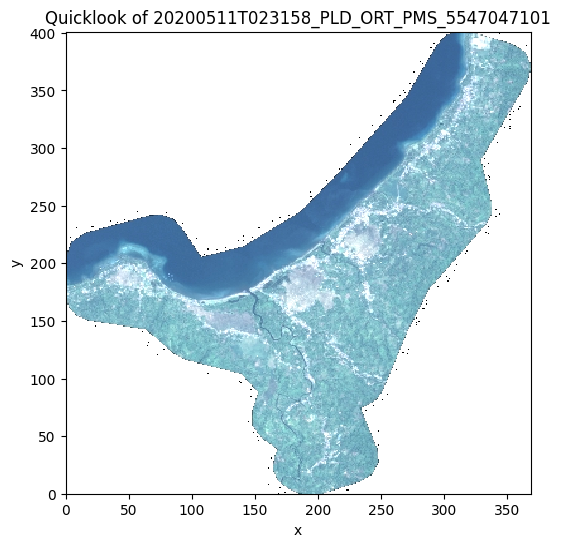

In [4]:
# Plot the quicklook. 
# The quicklook is not georeferenced
prod.plot(nodata=0)

In [5]:
# Get the bands information
prod.bands

eoreader.SpectralBand 'RED'
Attributes:
	id: 1
	eoreader_name: RED
	common_name: red
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 650.0
	Bandwidth (nm): 120.0
eoreader.SpectralBand 'GREEN'
Attributes:
	id: 2
	eoreader_name: GREEN
	common_name: green
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 560.0
	Bandwidth (nm): 120.0
eoreader.SpectralBand 'BLUE'
Attributes:
	id: 3
	eoreader_name: BLUE
	common_name: blue
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 495.0
	Bandwidth (nm): 70.0
eoreader.SpectralBand 'NIR'
Attributes:
	id: 4
	eoreader_name: NIR
	common_name: nir
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 840.0
	Bandwidth (nm): 200.0
eoreader.SpectralBand 'NIR'
Attributes:
	id: 4
	eoreader_name: NIR
	common_name: nir
	gsd (m): 0.5
	asset_role: reflectance
	Center wavelength (nm): 840.0
	Bandwidth (nm): 200.0

In [6]:
# The acquisition datetime of the Pleidaes image
print(f"Acquisition datetime: {prod.datetime}")


Acquisition datetime: 2020-05-11 02:31:58


In [7]:
# The condensed name of the Pleiade image: 
# this is a unified and compact way of naming all EOReader products in the same fashion
print(f"Condensed name: {prod.condensed_name}")

Condensed name: 20200511T023158_PLD_ORT_PMS_5547047101


<Axes: >

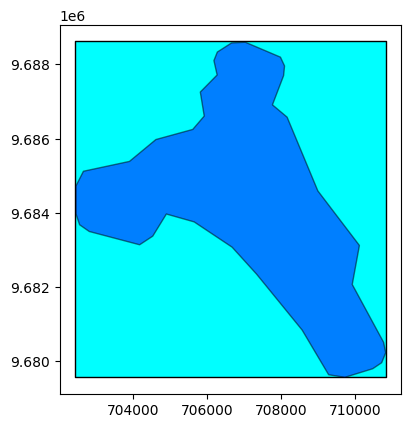

In [8]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()

base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

Here, if you want to orthorectify or pansharpen your data manually, you can set your stack here.

```python
prod.ortho_stack = "/path/to/ortho_stack.tif"
```

If you do not provide this stack, but you give a non-orthorectified product to EOReader
(i.e. `SEN` or `PRJ` products for Pleiades), you must provide a DEM to orthorectify correctly the data.

⚠️⚠️⚠️  
DIMAP SEN products are orthorectified using RPCs. Be sure to use a DEM with a knwon vertical CRS.  
If not allready Ellipsoid-based, such as the COPDEM-30, the vertical CRS will be reprojected to Ellipsoid.

## Load some bands

In [9]:
# Select the bands you want to load
bands = [GREEN, NDVI, TIR_1, CLOUDS, HILLSHADE]

# Be sure they exist for Pleiades sensor
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))  # Pleiades doesn't provide TIR and SHADOWS bands

['GREEN', 'NDVI', 'CLOUDS', 'HILLSHADE']


In [10]:
# Load those bands as a xarray.Dataset
band_ds = prod.load(ok_bands, pixel_size=2.0)
band_ds[GREEN]

2025-12-23 09:46:08,503 - [DEBUG] - Loading bands ['GREEN', 'NIR', 'RED']
2025-12-23 09:46:08,508 - [DEBUG] - Read GREEN
2025-12-23 09:46:08,540 - [INFO] - Warping DIM_PHR1A_PMS_202005110231585_ORT_5547047101 to UTM with a 2.0 m pixel size.
2025-12-23 09:46:08,591 - [DEBUG] - Writing warped band to /tmp/tmph1h7y757/tmp_20200511T023158_PLD_ORT_PMS_5547047101/20200511T023158_PLD_ORT_PMS_5547047101_2m.vrt
2025-12-23 09:46:08,626 - [DEBUG] - Reading warped GREEN.
2025-12-23 09:46:08,687 - [DEBUG] - Manage nodata for band GREEN
2025-12-23 09:46:08,688 - [DEBUG] - Load nodata
2025-12-23 09:46:08,796 - [DEBUG] - Rasterizing ROI mask
2025-12-23 09:46:09,160 - [DEBUG] - Set nodata mask
2025-12-23 09:46:09,210 - [DEBUG] - Converting GREEN to reflectance (if needed)
2025-12-23 09:46:09,223 - [DEBUG] - Clip the reflectance array to 0 as minimum value (in some cases, reflectance can have higher value than 1)
/opt/conda/lib/python3.11/site-packages/rasterio/warp.py:387: NotGeoreferencedWarning: Data

<xarray.DataArray <SpectralBandNames.GREEN: 'GREEN'> (band: 1, y: 4531, x: 4189)> Size: 76MB
dask.array<clip, shape=(1, 4531, 4189), dtype=float32, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
    spatial_ref  int64 8B 0
  * band         (band) int64 8B 1
  * y            (y) float64 36kB 9.689e+06 9.689e+06 ... 9.68e+06 9.68e+06
  * x            (x) float64 34kB 7.024e+05 7.025e+05 ... 7.108e+05 7.108e+05
Attributes: (12/14)
    path:              /tmp/tmph1h7y757/tmp_20200511T023158_PLD_ORT_PMS_55470...
    long_name:         GREEN
    constellation:     Pleiades
    constellation_id:  PLD
    product_path:      /home/prods/PLEIADES/5547047101/IMG_PHR1A_PMS_001
    product_name:      PHR1A_PMS_202005110231585_ORT_5547047101
    ...                ...
    product_type:      Ortho Single Image
    acquisition_date:  20200511T023158
    condensed_name:    20200511T023158_PLD_ORT_PMS_5547047101
    orbit_direction:   DESCENDING
    radiometry:        reflectance
    cloud_cover:       0.0

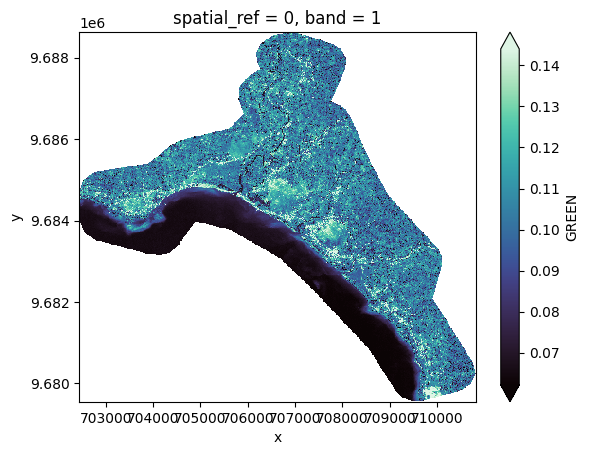

In [11]:
# The nan corresponds to the nodata you see on the footprint
# Plot a subsampled version of the GREEN band
band_ds[GREEN][:, ::10, ::10].plot(robust=True, cmap="mako")

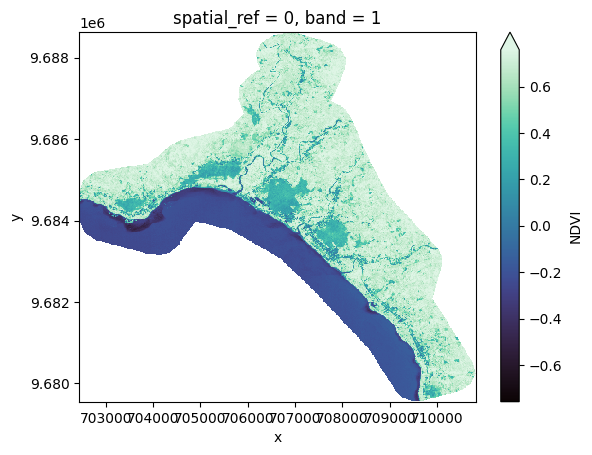

In [12]:
# Plot a subsampled version of the NDVI spectral index
band_ds[NDVI][:, ::10, ::10].plot(robust=True, cmap="mako")

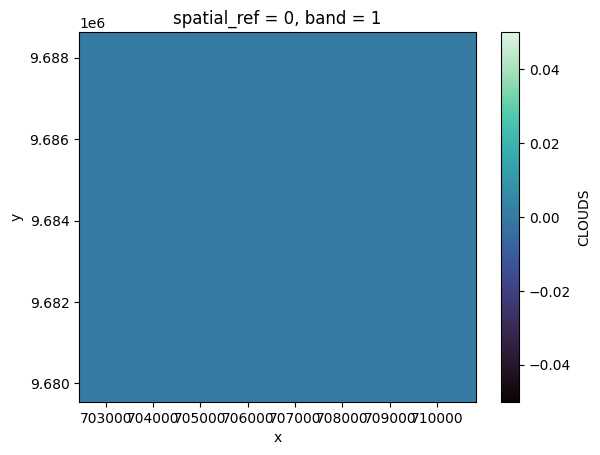

In [13]:
# Plot a subsampled version of the CLOUDS: this band is empty
band_ds[CLOUDS][:, ::10, ::10].plot(robust=True, cmap="mako")

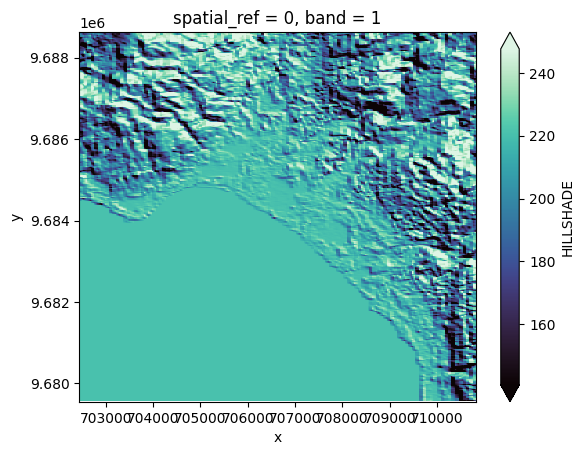

In [14]:
# Plot a subsampled version of the HILLSHADE
band_ds[HILLSHADE][:, ::10, ::10].plot(robust=True, cmap="mako")

## Stack some bands

In [15]:
# You can also stack those bands
stack = prod.stack(ok_bands, pixel_size=2.0)

2025-12-23 09:51:08,043 - [DEBUG] - Loading bands ['GREEN', 'NIR', 'RED']
2025-12-23 09:51:08,044 - [DEBUG] - Read GREEN
2025-12-23 09:51:08,064 - [DEBUG] - Read NIR
2025-12-23 09:51:08,082 - [DEBUG] - Read RED
2025-12-23 09:51:08,103 - [DEBUG] - Loading indices ['NDVI']
2025-12-23 09:51:08,124 - [DEBUG] - Loading DEM bands ['HILLSHADE']
2025-12-23 09:51:08,125 - [INFO] - Already existing DEM for /tmp/tmph1h7y757/tmp_20200511T023158_PLD_ORT_PMS_5547047101/20200511T023158_PLD_ORT_PMS_5547047101_DEM_COPDEM_30m.vrt. Skipping process.
2025-12-23 09:51:08,126 - [DEBUG] - Already existing hillshade DEM for PHR1A_PMS_202005110231585_ORT_5547047101. Skipping process.
2025-12-23 09:51:08,149 - [DEBUG] - Loading Cloud bands ['CLOUDS']
2025-12-23 09:51:08,197 - [DEBUG] - Stacking


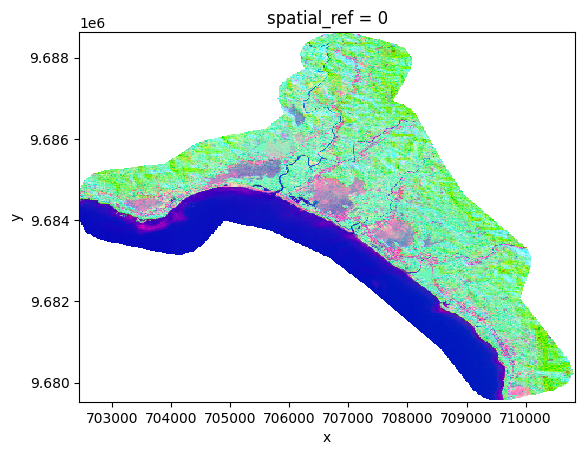

In [16]:
# Plot a subsampled version of the stack
from sertit import display
display_stack = stack[[0, 1, 3], ::10, ::10]  # There is no cloud, don't display it.
display_stack.copy(data=display.scale(display_stack.data)).plot.imshow(robust=True);